# Understanding Police Shootings in America
https://www.kaggle.com/code/gauravduttakiit/understanding-us-police-shootings/data?select=shootings.csv


__Period:__  JAN 02, 2015 to JUN 13, 2020

### Import libraries

In [115]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from acquire import get_police_shootings_data
from prepare import prepare_police_shootings_data, prepare_modeling_data
from sklearn.model_selection import train_test_split

# Stats libraries
import statsmodels.api as sm
import scipy.stats as stats


# plotting defaults
plt.rc('figure', figsize=(13, 5))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set alpha /confidence level 
alpha = 0.05 

# Planning 
- Understand the project requirements and rubric as outlined in CodeUp Curriculum.
- Stakeholders: Public, understand police shootings in the United States.
- Timeline:
    - Day 1: 
        - 1 Hour - Select a dataset / project to work on
        - 1 Hour - Project Planning
        - 2 hours - Data Acquired and Prepped
        - 2.5 hours - Initial EDA
    - Day 2:
        - 1 hour - Summarize your findings, perform next steps indicated from exploration, and wrap up any work needed prior to modeling.
        - 2 hours - Modeling
        - 2.5 hours - Iteration 2
        - 1 hour - Prepare to deliver
    - Day 3:
        - Further MVP Iteration
        - Project Summary/Write-up
        
    - Day 4:
        - Peer Review

# Acquire Data

In [116]:
# Get raw data

df = get_police_shootings_data()
df.shape

(4895, 15)

In [117]:
# Check for nulls 

df.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
arms_category              False
dtype: bool

### Acquire Prepared Data (Split into train, validate, test)

In [118]:
train, validate, test = prepare_police_shootings_data()
train.shape, validate.shape, test.shape

((2739, 27), (1175, 27), (979, 27))

In [119]:
train.isna().any()

manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
arms_category              False
year                       False
month                      False
day                        False
week                       False
quarter                    False
gun_violence               False
enc_sign_mentally_ill      False
enc_manner_death           False
enc_arm_category           False
enc_armed                  False
enc_attack_level           False
enc_flee                   False
enc_gender                 False
enc_body_camera            False
enc_race                   False
dtype: bool

# Prepare Data

In [120]:
# Number of unique Features
train.nunique().sort_values()

enc_sign_mentally_ill         1
enc_body_camera               1
manner_of_death               2
enc_gender                    2
gender                        2
enc_manner_death              2
signs_of_mental_illness       2
body_camera                   2
gun_violence                  2
enc_flee                      3
enc_attack_level              3
threat_level                  3
flee                          4
quarter                       4
enc_race                      5
year                          6
race                          6
arms_category                11
enc_arm_category             11
enc_armed                    11
month                        12
day                          31
state                        51
week                         53
armed                        66
age                          71
city                       1507
dtype: int64

In [121]:
# Train info

train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2739 entries, 2018-08-01 to 2018-01-07
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   manner_of_death          2739 non-null   object 
 1   armed                    2739 non-null   object 
 2   age                      2739 non-null   float64
 3   gender                   2739 non-null   object 
 4   race                     2739 non-null   object 
 5   city                     2739 non-null   object 
 6   state                    2739 non-null   object 
 7   signs_of_mental_illness  2739 non-null   bool   
 8   threat_level             2739 non-null   object 
 9   flee                     2739 non-null   object 
 10  body_camera              2739 non-null   bool   
 11  arms_category            2739 non-null   object 
 12  year                     2739 non-null   int64  
 13  month                    2739 non-null   int64  
 14  day   

In [122]:
# Train Describe 

train.describe()

,age,year,month,day,week,quarter,gun_violence,enc_sign_mentally_ill,enc_manner_death,enc_arm_category,enc_armed,enc_attack_level,enc_flee,enc_gender,enc_body_camera,enc_race
count,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.0,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.0,2739.000000
mean,36.686322,2017.164294,6.046002,15.573567,24.446148,2.357065,0.563709,1.0,0.052574,6.811610,3.866740,1.267981,0.542534,0.955093,1.0,0.767068
std,12.706944,1.580338,3.450061,8.823981,15.027037,1.122320,0.496015,0.0,0.223222,3.832066,1.791176,0.525918,0.764868,0.207137,0.0,0.941959
min,6.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,27.000000,2016.000000,3.000000,8.000000,11.000000,1.000000,0.000000,1.0,0.000000,4.000000,2.000000,1.000000,0.000000,1.000000,1.0,0.000000
50%,35.000000,2017.000000,6.000000,16.000000,23.000000,2.000000,1.000000,1.0,0.000000,10.000000,5.000000,1.000000,0.000000,1.000000,1.0,0.000000
75%,45.000000,2018.000000,9.000000,23.000000,37.000000,3.000000,1.000000,1.0,0.000000,10.000000,5.000000,2.000000,1.000000,1.000000,1.0,1.000000
max,91.000000,2020.000000,12.000000,31.000000,53.000000,4.000000,1.000000,1.0,1.000000,10.000000,11.000000,2.000000,2.000000,1.000000,1.0,4.000000


In [123]:
train.head(2)

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,...,gun_violence,enc_sign_mentally_ill,enc_manner_death,enc_arm_category,enc_armed,enc_attack_level,enc_flee,enc_gender,enc_body_camera,enc_race
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,shot,gun,41.0,M,Black,Sussex County,VA,False,attack,Car,...,1,1.0,0,10.0,5.0,1,2.0,1,1.0,1.0
2017-08-08,shot,gun,17.0,M,Black,Dalton,IL,False,other,Other,...,1,1.0,0,10.0,5.0,2,1.0,1,1.0,1.0


# Explore

In [124]:
# Data time frame 

train.index.date.max(), train.index.date.min()

(datetime.date(2020, 6, 15), datetime.date(2015, 1, 2))

In [125]:
# for col in df.columns:
#     print('Column: '+ col)
#     plt.hist(df[col])
#     plt.show()

In [126]:
train.head(2)

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,...,gun_violence,enc_sign_mentally_ill,enc_manner_death,enc_arm_category,enc_armed,enc_attack_level,enc_flee,enc_gender,enc_body_camera,enc_race
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,shot,gun,41.0,M,Black,Sussex County,VA,False,attack,Car,...,1,1.0,0,10.0,5.0,1,2.0,1,1.0,1.0
2017-08-08,shot,gun,17.0,M,Black,Dalton,IL,False,other,Other,...,1,1.0,0,10.0,5.0,2,1.0,1,1.0,1.0


#### Popuation Variation by Race: 

<AxesSubplot:>

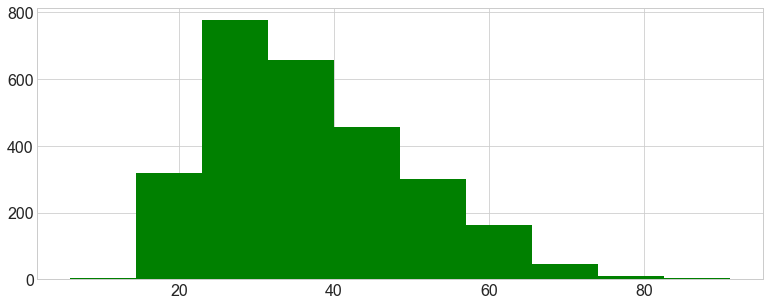

In [127]:
train.age.hist(color = 'green')

<AxesSubplot:>

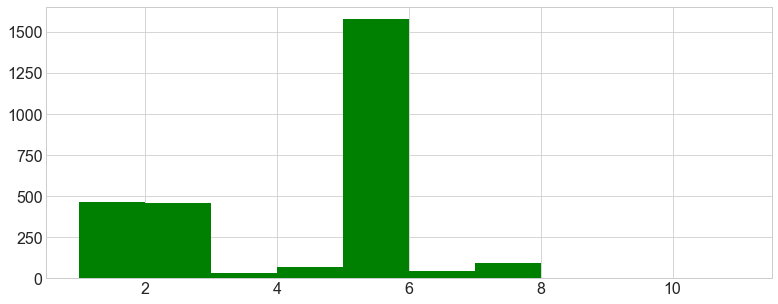

In [128]:
train.enc_armed.hist(color = 'green')

<AxesSubplot:>

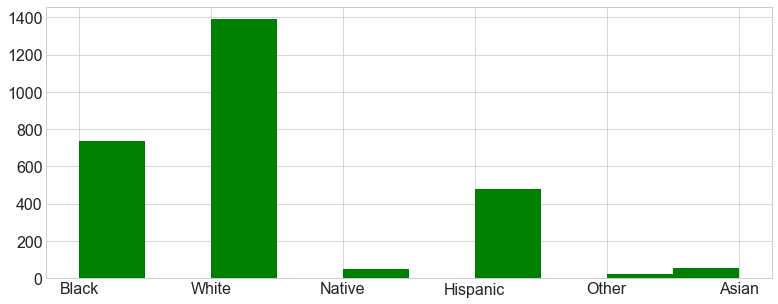

In [129]:
# Shootin
train.race.hist(color = 'green')

<AxesSubplot:>

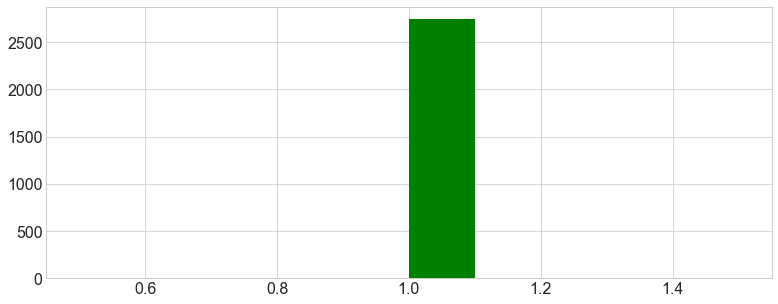

In [130]:
train.enc_sign_mentally_ill.hist(color = 'green')

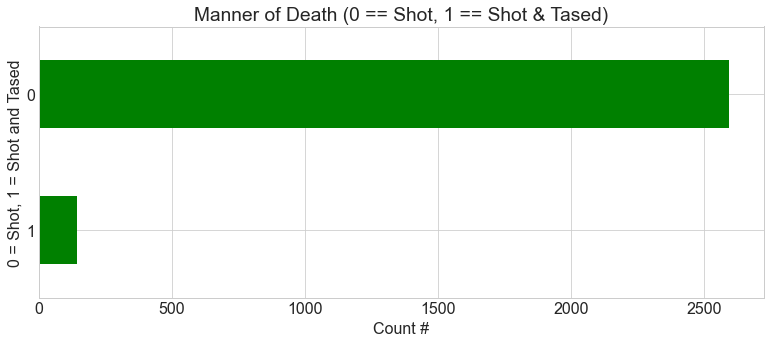

In [131]:
train.enc_manner_death.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Manner of Death (0 == Shot, 1 == Shot & Tased)", color = 'green')
plt.ylabel('0 = Shot, 1 = Shot and Tased')
plt.xlabel('Count #')
None

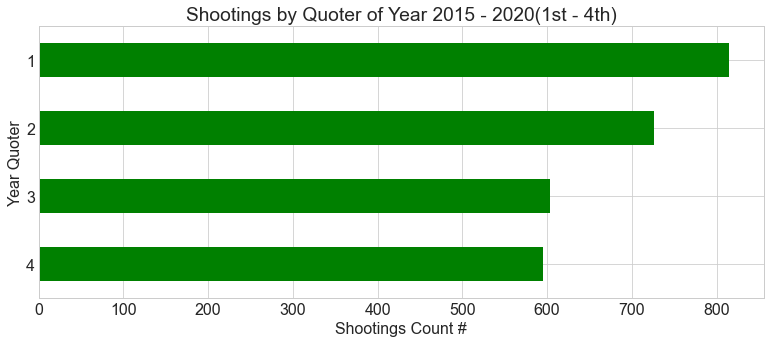

In [132]:
train.quarter.value_counts().iloc[:10].sort_values().plot(kind="barh", color = 'green',title = "Shootings by Quoter of Year 2015 - 2020(1st - 4th)")
plt.ylabel('Year Quoter')
plt.xlabel('Shootings Count #')

None

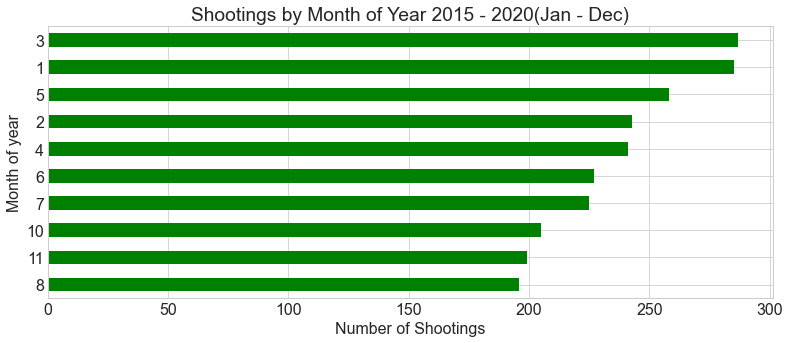

In [133]:
train.month.value_counts().iloc[:10].sort_values().plot(color = 'green',kind="barh", title = "Shootings by Month of Year 2015 - 2020(Jan - Dec)")

plt.ylabel('Month of year')
plt.xlabel('Number of Shootings')
plt.show()

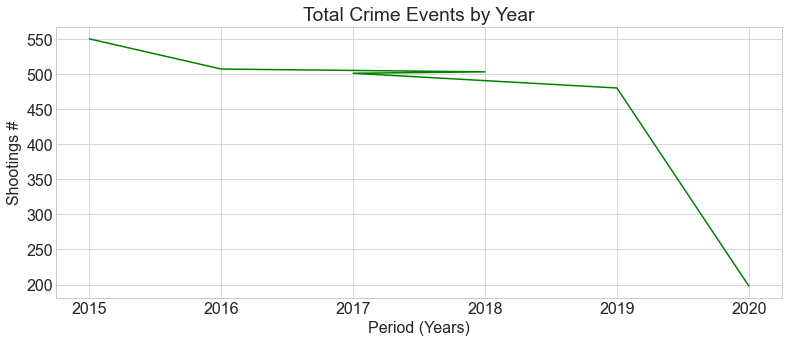

In [134]:
train['year'].value_counts().plot(kind="line", title = "Total Crime Events by Year", color = 'green')
plt.ylabel('Shootings #')
plt.xlabel('Period (Years)')
plt.show()

Text(0, 0.5, 'Shot Count #')

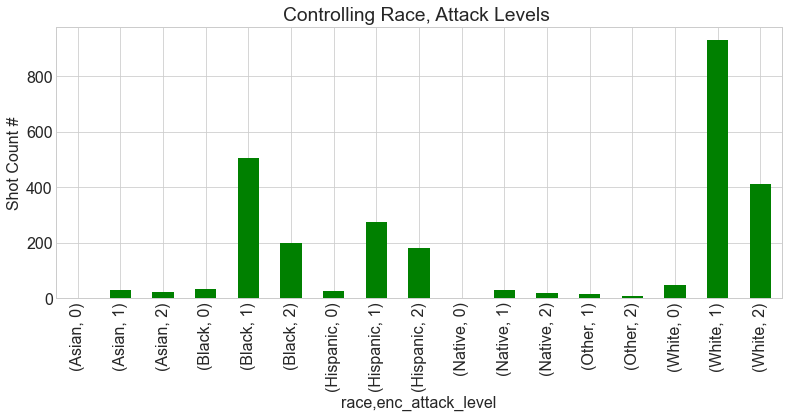

In [135]:
# Control race, check attack level
train.groupby(['race', 'enc_attack_level'] ).size().plot(color = 'green', kind = 'bar', title = ('Controlling Race, Attack Levels '))
plt.ylabel('Shot Count #')

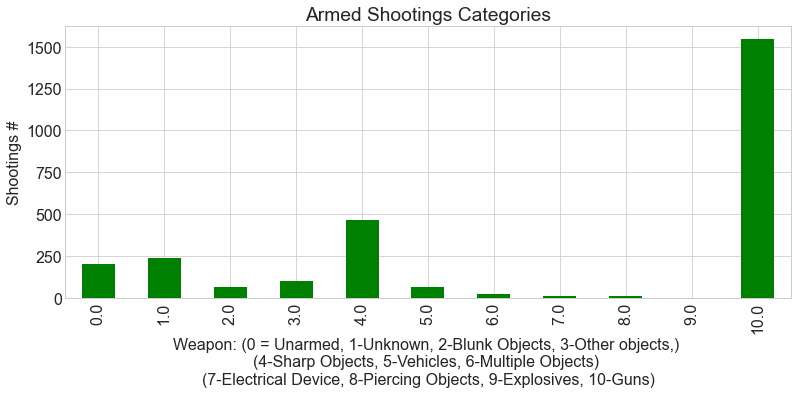

In [136]:
train.groupby(['enc_arm_category'] ).size().plot(kind = 'bar', title = ('Armed Shootings Categories'), color = 'green')
plt.ylabel('Shootings #')
plt.xlabel('Weapon: (0 = Unarmed, 1-Unknown, 2-Blunk Objects, 3-Other objects,) \n(4-Sharp Objects, 5-Vehicles, 6-Multiple Objects) \n(7-Electrical Device, 8-Piercing Objects, 9-Explosives, 10-Guns)')
plt.show()

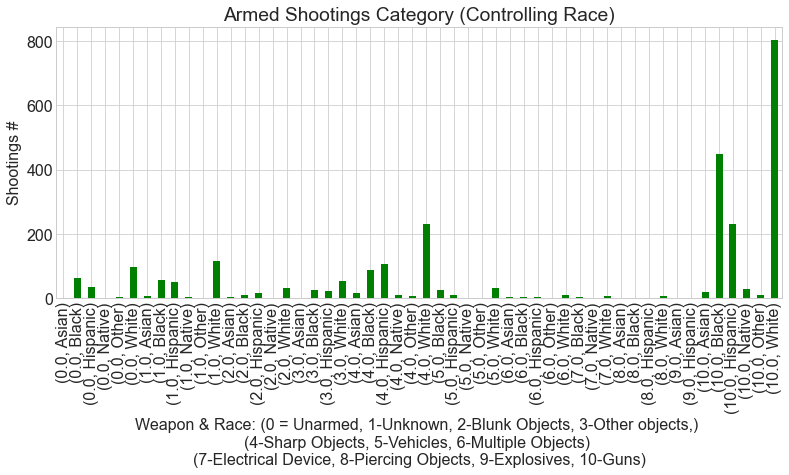

In [137]:
train.groupby(['enc_arm_category', 'race'] ).size().plot(kind = 'bar', title = ('Armed Shootings Category (Controlling Race)'),  color = 'green')
plt.ylabel('Shootings #')
plt.xlabel('Weapon & Race: (0 = Unarmed, 1-Unknown, 2-Blunk Objects, 3-Other objects,) \n(4-Sharp Objects, 5-Vehicles, 6-Multiple Objects) \n(7-Electrical Device, 8-Piercing Objects, 9-Explosives, 10-Guns)')
plt.show()

### Shootings Over the Years

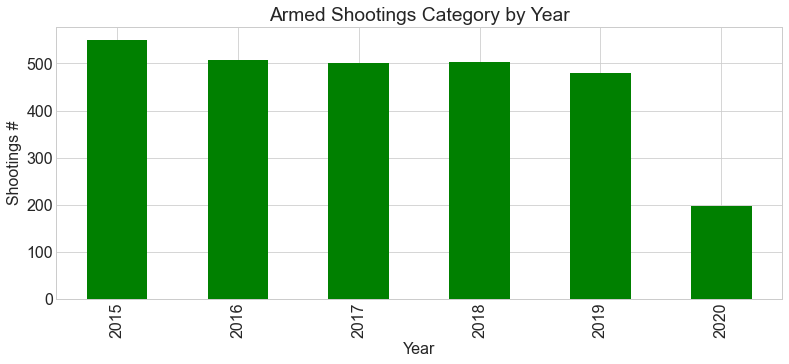

In [138]:
train.groupby(['year'] ).size().plot(kind = 'bar', title = ('Armed Shootings Category by Year'), color = 'green')
plt.ylabel('Shootings #')
plt.xlabel('Year')
plt.show()

> ### Armed Types

- 0 - Unarmed 
- 1 - Unknown
- 2 - Blunt instrument
- 3 - Other unussual objects
- 4 - Sharp Objects
- 5 - Vehicles
- 6 - Multiple
- 7 - Electrical Devices
- 8 - Piercing Objects
- 9 - Explosives
- 10 - Guns


Text(0, 0.5, 'Arm Category')

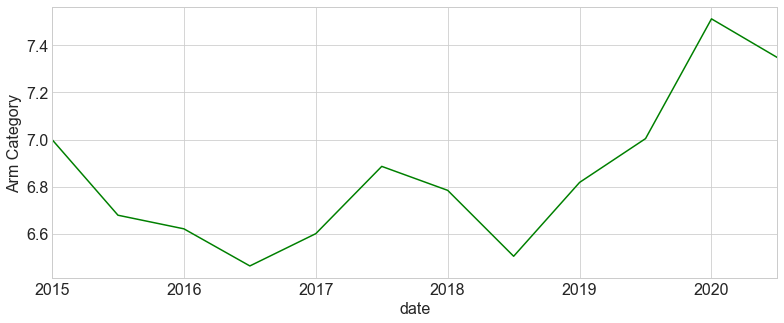

In [139]:
# Train the feature
y = train.enc_arm_category

y.resample('6M').mean().plot(color = 'g')
plt.ylabel('Arm Category')

> ### Suspect Fleeing from police

- 'Not fleeing': 0, 
- 'Foot': 1, 
- 'Car':2, 
- 'other':3

--> Suspects rate of flee from police appears increasing over the years

In [140]:
# Train the feature
y = train.enc_flee

Text(0, 0.5, '')

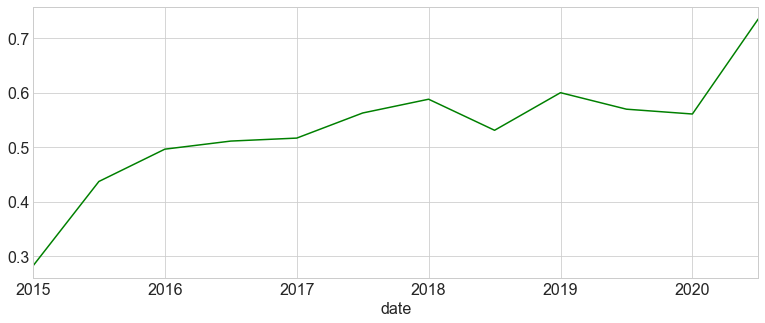

In [141]:
y.resample('6M').mean().plot(color = 'g')
plt.ylabel('')

> ### Manner of Death

--> More and more suspects are being shot as compared to being shot and tased

<AxesSubplot:xlabel='date'>

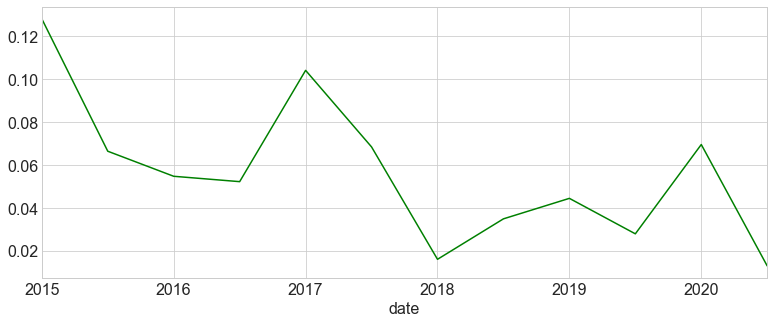

In [142]:
# Train the feature
y = train.enc_manner_death

y.resample('6M').mean().plot(color = 'g')

> ### Suspect's Age

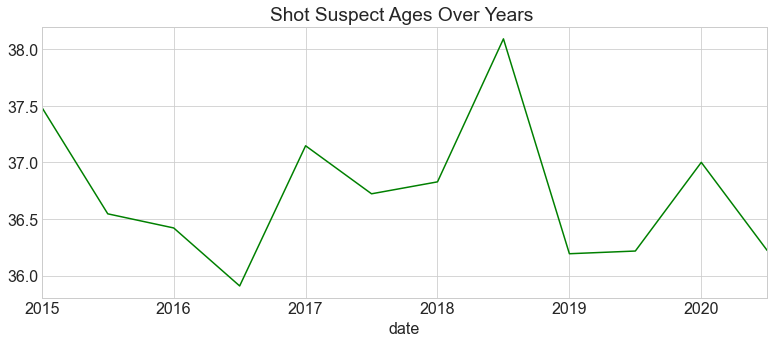

In [143]:
y = train.age
y.resample('6M').mean().plot(color = 'g')
plt.title('Shot Suspect Ages Over Years ')
None

> ### Shootings By State 
#### (a). Top ten leading 

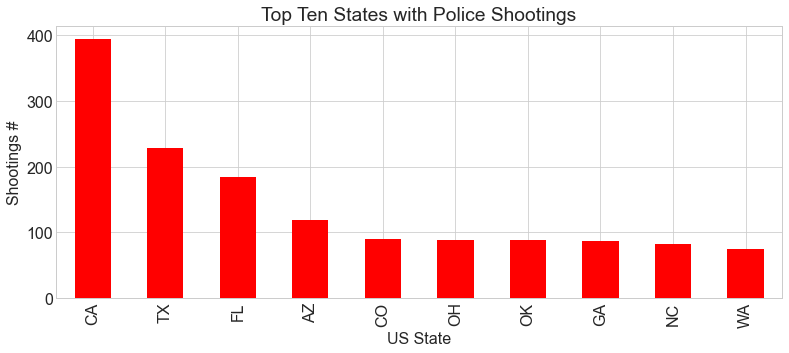

In [148]:
train.state.value_counts()[:10].plot(kind = 'bar', title = ('Top Ten States with Police Shootings'),  color = 'red')
plt.ylabel('Shootings #')
plt.xlabel('US State')
plt.show()

#### (a).  Least Shooting incidents by State (Safest)

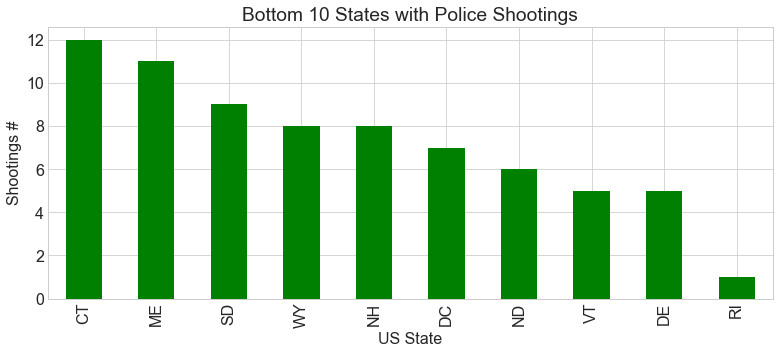

In [149]:
train.state.value_counts()[-10:].plot(kind = 'bar', title = ('Bottom 10 States with Police Shootings'),  color = 'green')
plt.ylabel('Shootings #')
plt.xlabel('US State')
plt.show()

> ### Shootings By City 
#### (a). Top ten leading cities

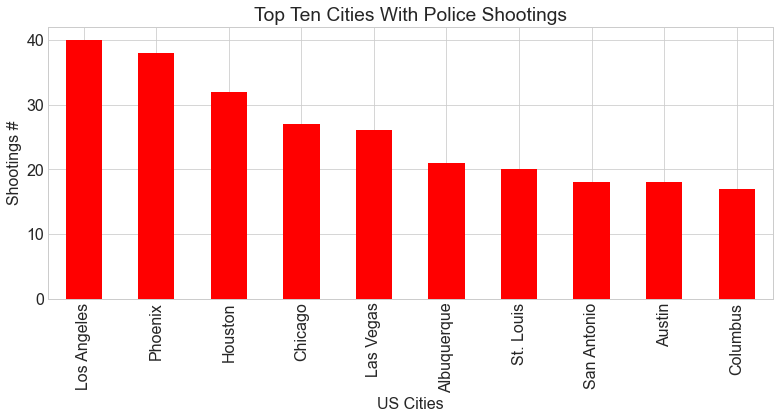

In [150]:
train.city.value_counts()[:10].plot(kind = 'bar', title = ('Top Ten Cities With Police Shootings'),  color = 'red')
plt.ylabel('Shootings #')
plt.xlabel('US Cities')
plt.show()

#### (b). Bottom Ten Cities with Police Shootings (Safest)

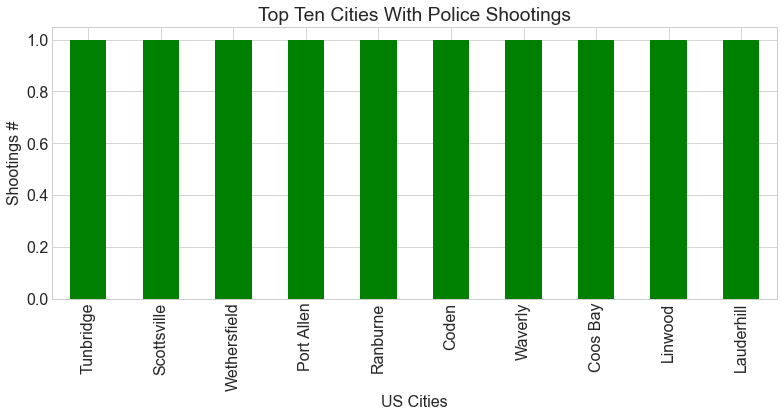

In [151]:
train.city.value_counts()[-10:].plot(kind = 'bar', title = ('Top Ten Cities With Police Shootings'),  color = 'green')
plt.ylabel('Shootings #')
plt.xlabel('US Cities')
plt.show()

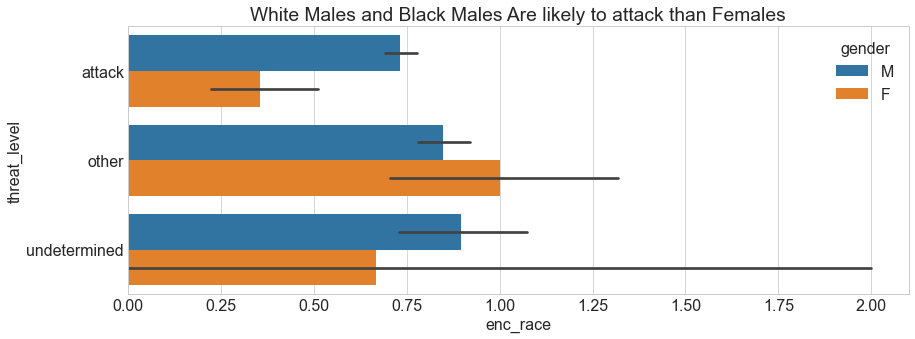

In [152]:
plt.title("White Males and Black Males Are likely to attack than Females")
sns.barplot(x="enc_race", y="threat_level", hue="gender", data = train)
flee_rate = train.enc_attack_level.mean()
plt.tight_layout()

plt.show()

In [153]:
caucasian_count = train[train.race == 'White'].race.count()
black_count = train[train.race == 'Black'].race.count()
hispanic_count = train[train.race == 'Hispanic'].race.count()
native_count = train[train.race == 'Native'].race.count()
asian_count = train[train.race == 'Asian'].race.count()
other_race_count = train[train.race == 'other'].race.count()
print(f'Caucasian: {caucasian_count}\nBlack: {black_count}\nHispanics: {hispanic_count}\nNative American: {native_count}\nAsian: {asian_count}\nOther Enthicity: {other_race_count}')

Caucasian: 1389
Black: 737
Hispanics: 481
Native American: 51
Asian: 56
Other Enthicity: 0


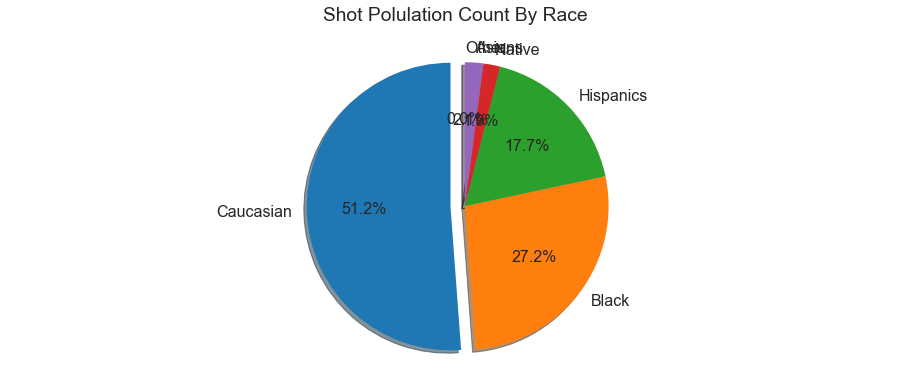

In [154]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Caucasian', 'Black', 'Hispanics', 'Native', 'Asians','Other'
sizes = [caucasian_count, black_count, hispanic_count, native_count, asian_count,other_race_count ]
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title('Shot Polulation Count By Race \n')
plt.show()

### Take Aways
- Of all shootings, guns account for over 1500 incidents as choice of weapon. Sharp objects come 2nd at around 450 incidents. 
- Over 200 incidents involved unknown weapons and about 190 shootings involved unarmed suspects. 
- White community most shot community in America, followed by black and Hispanic community. Native America least shot population
- White population used guns in over 800 incidents, followed by black community using guns at around 450 incidents. Hispanic community groups using guns totaled around 250 incidents and 4th crime being white community using sharp objects at around 220 incidents.
- Males are over 4500 times more likely to be shot than females
- Population between ages 22 to 30 are more likely to be shot than any other age bracket. Followed closely by age range 30 to 40 and 3rd 40 - 50 years olds. Least likely age group are below 13 years and above 75 years old. 
- Nearly all police shootings suspects have no signs of mental illness.
- Nearly all deaths are as a result of gun shot. Little percentage are precipitated by use of taser then gun-shot.
- Controlling race, attack level 1 for white population, is higher than all other groups, followed by black with attack level 1. White with attack level 2 is higher than any other race other than black and white with attack level 1.
- California --> Texas --> Florida and --> Arizona are leading states with police shootings incidents
- Los Angeles,CA --> Phoenix, AZ --> Houston, TX and --> Chicago, IL are leading cities with police shootings incidents 

- All incidents here body cameras we worn

## Initial Questions
- (1). Is there a relationship between race and gun violence?
- (2). With gun violence, is there a relationship between races and police level of lethal force (threat level)?
- (3). With gun violence, does the manner of death differ between races? 
- (4). With gun violence, does fleeing suspects likely to be shot based on race?
- (5). Are black gun violence suspects more likely to be shot by police than other races?


## QUIZ (1). Is there a relationship between race and gun violence?

In [155]:
# Create a Gun Violence columns 
H0 = 'Gun violence is independent of race'
H1 = 'Gun violence is NOT independent of race'

train['gun_violence'] = np.where(train['arms_category']== 'Guns', 1, 0)
validate['gun_violence'] = np.where(validate['arms_category']== 'Guns', 1, 0)
test['gun_violence'] = np.where(test['arms_category']== 'Guns', 1, 0)

In [156]:
# Subsets of gun violence vs non gun violence 

gun_violence_set = train[train.arms_category == 'Guns']
non_gun_violence_set = train[train.arms_category != 'Guns']

#### Gun Violence 


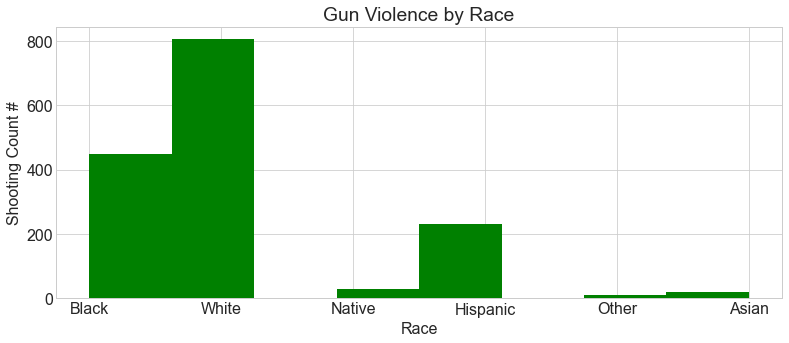

In [157]:
# Gun Violence Attack to police

gun_violence_set.race.hist(color = 'green', bins = 8)
plt.title('Gun Violence by Race')
plt.xlabel('Race')
plt.ylabel('Shooting Count #')
None

#### Non gun violence 

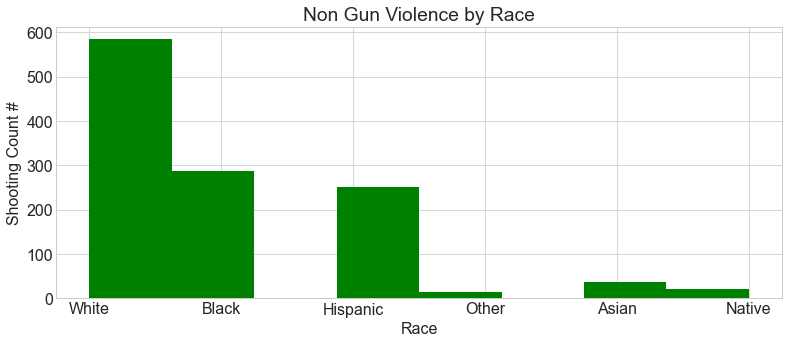

In [158]:

non_gun_violence_set.race.hist(color = 'green', bins = 8)
plt.title('Non Gun Violence by Race')
plt.xlabel('Race')
plt.ylabel('Shooting Count #')
None

In [159]:
# gun violence %

n = train.shape[0]
gun_violence_percentage = train.gun_violence.value_counts() /n 
gun_violence_percentage

1    0.563709
0    0.436291
Name: gun_violence, dtype: float64

In [160]:
# Race by gun violence 

race_gun_violence = gun_violence_set.race.value_counts() / n
race_gun_violence

White       0.293903
Black       0.164294
Hispanic    0.083972
Native      0.010588
Asian       0.007302
Other       0.003651
Name: race, dtype: float64

In [161]:
# Create a cross tab race vs gun violence

observed = pd.crosstab(train.race, train.gun_violence)
observed

gun_violence,0,1
race,,
Asian,36,20
Black,287,450
Hispanic,251,230
Native,22,29
Other,15,10
White,584,805


In [162]:
# % Combinations of race and gun violence 

expected = pd.DataFrame()

for gun_violence_group, t_prop in gun_violence_percentage.iteritems():
    for race_gun_group, d_prop in race_gun_violence.iteritems():
        expected.loc[race_gun_group, gun_violence_group] = t_prop * d_prop

expected.sort_index(inplace=True)
expected

,1,0
Asian,0.004116,0.003186
Black,0.092614,0.071680
Hispanic,0.047336,0.036636
Native,0.005968,0.004619
Other,0.002058,0.001593
White,0.165676,0.128227


In [163]:
# By Numbers

expected *= n
expected

,1,0
Asian,11.274188,8.725812
Black,253.669222,196.330778
Hispanic,129.653158,100.346842
Native,16.347572,12.652428
Other,5.637094,4.362906
White,453.786053,351.213947


In [164]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.5f}')
print(f'p     = {p:.5f}')



Observed

[[ 36  20]
 [287 450]
 [251 230]
 [ 22  29]
 [ 15  10]
 [584 805]]
---
Expected

[[ 24.43227455  31.56772545]
 [321.54618474 415.45381526]
 [209.85578678 271.14421322]
 [ 22.25082147  28.74917853]
 [ 10.90726543  14.09273457]
 [606.00766703 782.99233297]]
---

chi^2 = 34.75711
p     = 0.00000


In [165]:
if p /2 > alpha:
    print(f"FAILED TO REJECT HO:--> {H0}")

else:
    print(f"REGECT HO:-->  {H0}")


REGECT HO:-->  Gun violence is independent of race


#### Observations
- Shootings by gun violence account for 56.37% of crimes 
- Shootings by non gun violence accounts for 43.62%
- Likelihood to be shot by Gun Violence (races):
    - __White 29.4%__ 
    - __Black is 16.4%__  
    - __Hispanics 8.4%__
    - __Native 1.1%__
    - __Asians 0.7%__
    - __Others 0.04%__

### Q1 Conclusion: __Gun violence is NOT independent of race.__

## QUIZ (2): With gun violence, is there a relationship between races and suspect's threat level to police?


#### Gun Violence 

'White': 0, 'Black': 1, 'Hispanic':2, 'Native':3, 'Asian':4, 'other':5

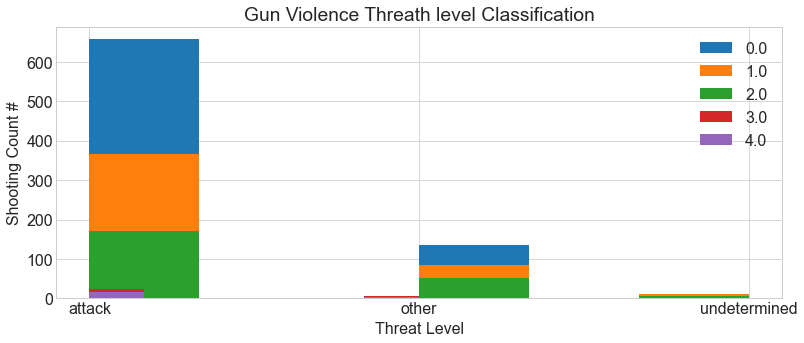

In [166]:
H0 = 'Elevated attack to police by gun violence is independent of race'
H1 = 'Elevated attack to police by gun violence is NOT independent of race'


# Gun Violence Attack to police
gun_violence_set.groupby(['enc_race']).threat_level.hist(stacked = False, legend = True, bins = 6)
plt.title('Gun Violence Threath level Classification')
plt.xlabel('Threat Level')
plt.ylabel('Shooting Count #')
None

#### Non Gun violence
'White': 0, 'Black': 1, 'Hispanic':2, 'Native':3, 'Asian':4, 'other':5

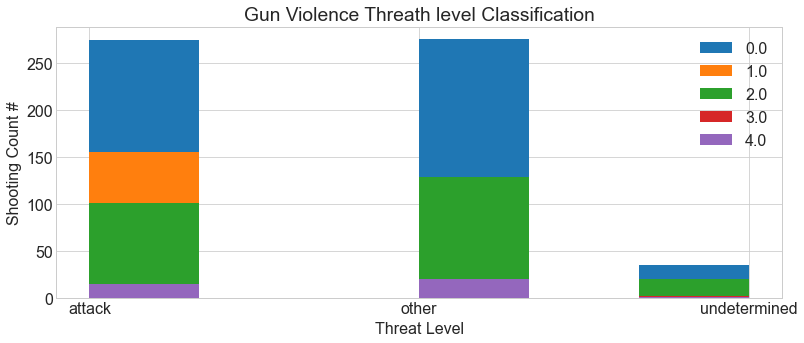

In [167]:
# Gun Violence Attack to police
non_gun_violence_set.groupby(['enc_race']).threat_level.hist(stacked = False, legend = True, bins = 6)
plt.title('Gun Violence Threath level Classification')
plt.xlabel('Threat Level')
plt.ylabel('Shooting Count #')
None

In [179]:
# Create subset of gun violence and attacked police 

attack_level_gun_violence_set = gun_violence_set[(gun_violence_set.threat_level == 'attack') | 
                                                 (gun_violence_set.threat_level == 'other') | 
                                                 (gun_violence_set.threat_level == 'undetermined') ]


In [181]:
# Attack to police by gun violence %

n2 = attack_level_gun_violence_set.shape[0]
attack_gun_violence_percentage = attack_level_gun_violence_set.threat_level.value_counts() /n2 
attack_gun_violence_percentage

attack          0.799223
other           0.181347
undetermined    0.019430
Name: threat_level, dtype: float64

In [183]:
n2 = train.shape[0]
# Race by gun violence 

attack_race_gun_violence = attack_level_gun_violence_set.race.value_counts() / n2
attack_race_gun_violence

White       0.293903
Black       0.164294
Hispanic    0.083972
Native      0.010588
Asian       0.007302
Other       0.003651
Name: race, dtype: float64

In [184]:
# Create a cross tab race vs gun violence

observed2 = pd.crosstab(attack_level_gun_violence_set.race, attack_level_gun_violence_set.threat_level)
observed2

threat_level,attack,other,undetermined
race,,,
Asian,16,4,0
Black,356,83,11
Hispanic,172,51,7
Native,24,5,0
Other,9,1,0
White,657,136,12


In [185]:
# % Combinations of race and gun violence 

expected2 = pd.DataFrame()

for attack_gun_violence_group, t_prop in attack_gun_violence_percentage.iteritems():
    for attack_race_gun_group, d_prop in attack_race_gun_violence.iteritems():
        expected2.loc[attack_race_gun_group, attack_gun_violence_group] = t_prop * d_prop

expected2.sort_index(inplace=True)
expected2


,attack,other,undetermined
Asian,0.005836,0.001324,0.000142
Black,0.131307,0.029794,0.003192
Hispanic,0.067113,0.015228,0.001632
Native,0.008462,0.001920,0.000206
Other,0.002918,0.000662,0.000071
White,0.234894,0.053298,0.005711


In [186]:
chi2, p, degf, expected2 = stats.chi2_contingency(observed2)

print('Observed\n')
print(observed2.values)
print('---\nExpected\n')
print(expected2)
print('---\n')
print(f'chi^2 = {chi2:.5f}')
print(f'p     = {p:.5f}')



Observed

[[ 16   4   0]
 [356  83  11]
 [172  51   7]
 [ 24   5   0]
 [  9   1   0]
 [657 136  12]]
---
Expected

[[1.59844560e+01 3.62694301e+00 3.88601036e-01]
 [3.59650259e+02 8.16062176e+01 8.74352332e+00]
 [1.83821244e+02 4.17098446e+01 4.46891192e+00]
 [2.31774611e+01 5.25906736e+00 5.63471503e-01]
 [7.99222798e+00 1.81347150e+00 1.94300518e-01]
 [6.43374352e+02 1.45984456e+02 1.56411917e+01]]
---

chi^2 = 8.44395
p     = 0.58556


In [187]:
if p /2 > alpha:
    print(f"FAILED TO REJECT HO:--> {H0}")

else:
    print(f"REGECT HO:-->  {H0}")


FAILED TO REJECT HO:--> Elevated attack to police by gun violence is independent of race


#### Observations # 2
- Of gun violence suspects, 79.9% of suspects attacked police
- Of these gun suspects that attacked police:
    - White  --     65.24%
    - Black   --    36.47%
    - Hispanic --   18.64% 
    - Native --     2.35%
    - Asian  --      1.62%
    - Other  --     0.81%
    
### Q1 Conclusion: __Elevated attack to police by gun violence is independent of race__
--> In other words, race in combination with attack to police does NOT results in gun shots

## QUIZ (3). With gun violence, does the manner of death differ between races? 
#### Manner of Deaths:
     
     - Shot 
     
     - Shot and tased

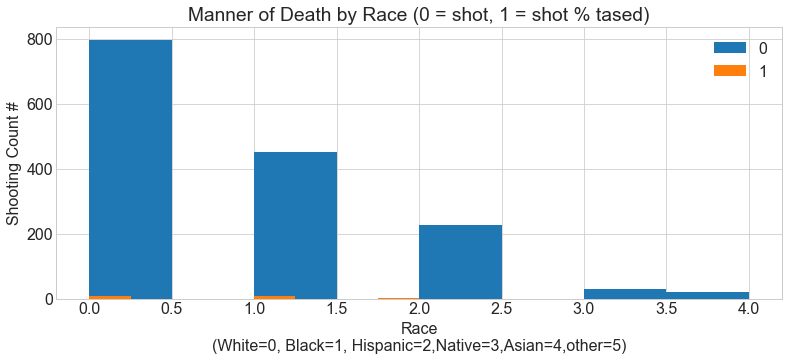

In [188]:
H0 = 'Manner of gun violence suspect is independent of race'
H1 = 'Manner of gun violence suspect is NOT independent of race'

# Gun Violence Attack to police
gun_violence_set.groupby(['enc_manner_death']).enc_race.hist(stacked = False, legend = True, bins = 8)
plt.title('Manner of Death by Race (0 = shot, 1 = shot % tased)')
plt.xlabel('Race\n(White=0, Black=1, Hispanic=2,Native=3,Asian=4,other=5)')
plt.ylabel('Shooting Count #')
None

#### Gun Violence Supspects

White=0, Black=1, Hispanic=2, Native=3, Asian=4, other=5

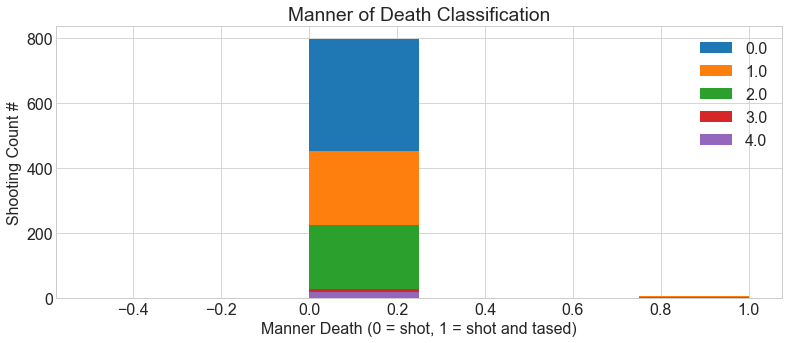

In [189]:
# Gun Violence Attack to police
gun_violence_set.groupby(['enc_race']).enc_manner_death.hist(stacked = False, legend = True, bins = 4)
plt.title('Manner of Death Classification')
plt.xlabel('Manner Death (0 = shot, 1 = shot and tased)')
plt.ylabel('Shooting Count #')
None

#### Non-Gun Violence Suspects

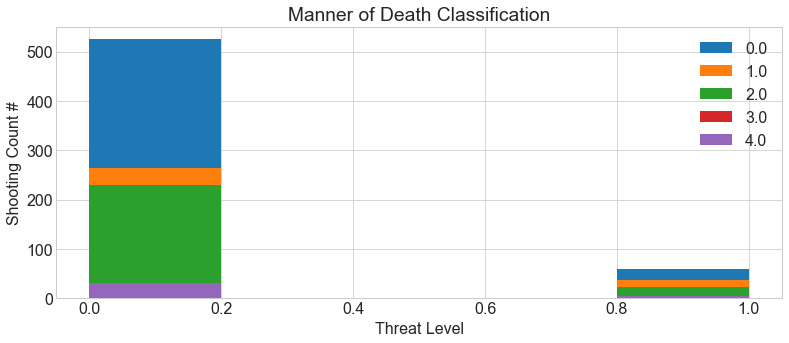

In [190]:
# Gun Violence Attack to police
non_gun_violence_set.groupby(['enc_race']).enc_manner_death.hist(stacked = False, legend = True, bins = 5)
plt.title('Manner of Death Classification')
plt.xlabel('Threat Level')
plt.ylabel('Shooting Count #')
None

In [191]:
# gun violence %

n3 = train.shape[0]
manner_death_gun_violence_percentage = gun_violence_set.enc_manner_death.value_counts() /n3 
manner_death_gun_violence_percentage

0    0.556407
1    0.007302
Name: enc_manner_death, dtype: float64

In [193]:
n3 = train.shape[1]
# Race by gun violence 

manner_death_race_gun_violence = gun_violence_set.race.value_counts() / n3
manner_death_race_gun_violence

White       29.814815
Black       16.666667
Hispanic     8.518519
Native       1.074074
Asian        0.740741
Other        0.370370
Name: race, dtype: float64

In [194]:
# Create a cross tab race vs gun violence and manner of death

observed3 = pd.crosstab(gun_violence_set.race, gun_violence_set.enc_manner_death)
observed3

enc_manner_death,0,1
race,,
Asian,20,0
Black,443,7
Hispanic,226,4
Native,29,0
Other,9,1
White,797,8


In [195]:
# % Combinations of race and gun violence 

expected3 = pd.DataFrame()

for manner_death_gun_violence_group, t_prop in manner_death_gun_violence_percentage.iteritems():
    for manner_death_race_gun_group, d_prop in manner_death_race_gun_violence.iteritems():
        expected3.loc[manner_death_race_gun_group, manner_death_gun_violence_group] = t_prop * d_prop

expected3.sort_index(inplace=True)
expected3

,0,1
Asian,0.412154,0.005409
Black,9.273457,0.121699
Hispanic,4.739767,0.062202
Native,0.597623,0.007843
Other,0.206077,0.002704
White,16.589185,0.217706


In [196]:
chi2, p, degf, expected3 = stats.chi2_contingency(observed3)

print('Observed\n')
print(observed3.values)
print('---\nExpected\n')
print(expected3)
print('---\n')
print(f'chi^2 = {chi2:.5f}')
print(f'p     = {p:.5f}')

Observed

[[ 20   0]
 [443   7]
 [226   4]
 [ 29   0]
 [  9   1]
 [797   8]]
---
Expected

[[1.97409326e+01 2.59067358e-01]
 [4.44170984e+02 5.82901554e+00]
 [2.27020725e+02 2.97927461e+00]
 [2.86243523e+01 3.75647668e-01]
 [9.87046632e+00 1.29533679e-01]
 [7.94572539e+02 1.04274611e+01]]
---

chi^2 = 7.73448
p     = 0.17149


In [197]:
if p /2 > alpha:
    print(f"FAILED TO REJECT HO:--> {H0}")

else:
    print(f"REGECT HO:-->  {H0}")

FAILED TO REJECT HO:--> Manner of gun violence suspect is independent of race


#### Observations # 3 Summary
- Of gun violence suspects, 98.7% were shot without being tased.
- Of these gun suspects that were shot and NOT TASED:

    - White  --     65.24%
    - Black   --    36.47%
    - Hispanic --   18.64% 
    - Native --     2.35%
    - Asian  --      1.62%
    - Other  --     0.81%
    
    
- Tased and Shot:
    - White       29.82%
    - Black       16.67%
    - Hispanic     8.52%
    - Native       1.07%
    - Asian        0.74%
    - Other        0.37%
    
### Q1 Conclusion: __Manner of death to gun violence victims is independent of race__


### QUIZ (4). With gun violence, does fleeing suspects likely to be shot based on race?


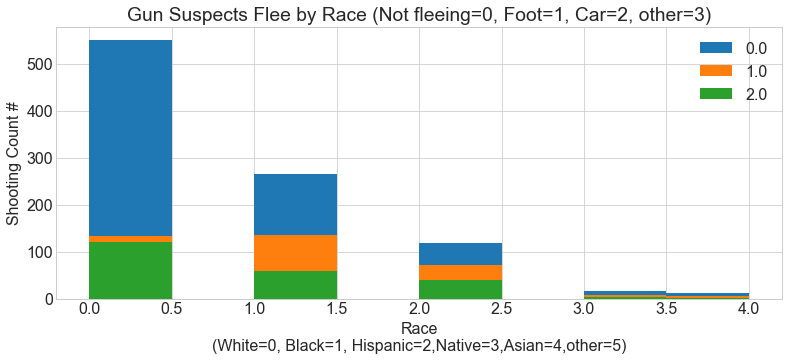

In [198]:
H0 = 'Fleeing of gun violence suspects is independent of race'
H1 = 'Fleeing of gun violence suspect is NOT independent of race'

# Gun Violence Attack to police
gun_violence_set.groupby(['enc_flee']).enc_race.hist(stacked = False, legend = True, bins = 8)
plt.title('Gun Suspects Flee by Race (Not fleeing=0, Foot=1, Car=2, other=3)')
plt.xlabel('Race\n(White=0, Black=1, Hispanic=2,Native=3,Asian=4,other=5)')
plt.ylabel('Shooting Count #')
None

In [199]:
# Fleeing gun violence suspects %

n4 = train.shape[0]
flee_gun_violence_percentage = gun_violence_set.enc_flee.value_counts() /n4 
flee_gun_violence_percentage

0.0    0.352318
1.0    0.129974
2.0    0.081417
Name: enc_flee, dtype: float64

In [201]:
n4 = train.shape[1]
# Race by gun violence 

manner_death_race_gun_violence = gun_violence_set.race.value_counts() / n4
manner_death_race_gun_violence

White       29.814815
Black       16.666667
Hispanic     8.518519
Native       1.074074
Asian        0.740741
Other        0.370370
Name: race, dtype: float64

In [202]:
# Create a cross tab race vs gun violence and manner of death

observed4 = pd.crosstab(gun_violence_set.race, gun_violence_set.enc_flee)
observed4

enc_flee,0.0,1.0,2.0
race,,,
Asian,13,6,1
Black,258,135,57
Hispanic,119,72,39
Native,17,8,4
Other,7,1,2
White,551,134,120


In [203]:
chi2, p, degf, expected4 = stats.chi2_contingency(observed3)

print('Observed\n')
print(observed4.values)
print('---\nExpected\n')
print(expected4)
print('---\n')
print(f'chi^2 = {chi2:.5f}')
print(f'p     = {p:.5f}')

Observed

[[ 13   6   1]
 [258 135  57]
 [119  72  39]
 [ 17   8   4]
 [  7   1   2]
 [551 134 120]]
---
Expected

[[1.97409326e+01 2.59067358e-01]
 [4.44170984e+02 5.82901554e+00]
 [2.27020725e+02 2.97927461e+00]
 [2.86243523e+01 3.75647668e-01]
 [9.87046632e+00 1.29533679e-01]
 [7.94572539e+02 1.04274611e+01]]
---

chi^2 = 7.73448
p     = 0.17149


In [204]:
if p /2 > alpha:
    print(f"FAILED TO REJECT HO:--> {H0}")

else:
    print(f"REGECT HO:-->  {H0}")

FAILED TO REJECT HO:--> Fleeing of gun violence suspects is independent of race


## QUIZ(5). Are black males gun violence suspects more likely to be shot by police than their white counterparts?


In [205]:
# Create sets of black vs non-black 
black_gun_violence = gun_violence_set[(gun_violence_set.race == 'Black') & (gun_violence_set.gender == 'M') ]
other_races = gun_violence_set[(gun_violence_set.race != 'Black') & (gun_violence_set.gender == 'M')]


## Summary:
- Gun violence is NOT independent on race (__in other words, there is a correlation in gun violence and race__) 
- Elevated attack to police by suspected gun violence is independent of race
- Manner of gun violence (shot or tased then shot) of suspect is independent of race
- Fleeing of gun violence suspects is independent of race
- Gun violence accounts to 56.37% of all crimes
- White population are 29.4% more likely to be shot in gun violent incidents.
- Black are 16.4% and Hispanics 8.4% more likely to be shot, 
- Natives 1.1% and Asians 0.7%



- The probability of police shootings is independent of race. 



# Modeling 
## Gun violence Prediction

In [275]:
# Import classification modules
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Acquire Modeling Data & Creat X and Y sets

In [271]:
# split into modeling train, validate, test
train, validate, test = prepare_modeling_data(target = 'gun_violence',seed = 123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['gun_violence'])
y_train = train.gun_violence

X_validate = validate.drop(columns=['gun_violence'])
y_validate = validate.gun_violence

X_test = test.drop(columns=['gun_violence'])
y_test = test.gun_violence


## (A). Decisicion Tree

#### Train the model

In [208]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)

#### Fit the model

In [209]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)

#### Make Prediction for gun violence

In [210]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:30]

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1])

#### Estimate Probability

In [211]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#### Compute Accuracy

In [212]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 1.00


In [213]:
y_train.value_counts()


1    1544
0    1195
Name: gun_violence, dtype: int64

#### Classification Report

In [214]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1195
           1       1.00      1.00      1.00      1544

    accuracy                           1.00      2739
   macro avg       1.00      1.00      1.00      2739
weighted avg       1.00      1.00      1.00      2739



In [215]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 1.00


#### Validate on Validate Set

In [216]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       671

    accuracy                           1.00      1175
   macro avg       1.00      1.00      1.00      1175
weighted avg       1.00      1.00      1.00      1175



## (B). Random Forest

#### Create the Object

In [244]:
rf = RandomForestClassifier(bootstrap = True, 
                            class_weight = None, 
                            criterion = 'gini',
                            min_samples_leaf = 3,
                            n_estimators = 100,
                            max_depth = 3, 
                            random_state = 123)

#### Fit the model

In [245]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [246]:
print(rf.feature_importances_)

[1.76823797e-02 4.00375746e-03 2.25241810e-03 3.11540312e-03
 3.64152013e-03 3.98209758e-04 0.00000000e+00 5.43148582e-02
 4.28695519e-01 3.53536121e-01 1.16511607e-01 5.77695636e-03
 3.28201523e-04 0.00000000e+00 9.74304825e-03]


#### Make Predictions

In [247]:
y_pred = rf.predict(X_train)

### Evaluate Model

#### Accuracy

In [248]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 1.00


In [249]:
# Confusion Matrix

print(confusion_matrix(y_train, y_pred))

[[1195    0]
 [   0 1544]]


In [250]:
# Classification Matrix

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1195
           1       1.00      1.00      1.00      1544

    accuracy                           1.00      2739
   macro avg       1.00      1.00      1.00      2739
weighted avg       1.00      1.00      1.00      2739



#### Validate Model

In [251]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 1.00


## (C). K-Nearest Neighbor

How close a new data point is to known data points?

#### Create KNN Object

In [255]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#### Fit the Model

In [257]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Make Predictions

In [263]:
y_pred = knn.predict(X_train)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [265]:
# Estimate Probability
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

#### Compute Accuracy

In [264]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.99


#### Classificaiton report



In [266]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1195
           1       0.98      1.00      0.99      1544

    accuracy                           0.99      2739
   macro avg       0.99      0.98      0.99      2739
weighted avg       0.99      0.99      0.99      2739



#### Validate KNN Model on out of sample data

In [270]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on validate set: 0.97


## (D). Logistic Regression Model

#### Create Object

In [296]:
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C = 1, class_weight = {0:1, 1:99}, random_state = 123, intercept_scaling = 1, solver = 'lbfgs')

#### Fit Model

In [297]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

In [298]:
# Make predictions

y_pred = logit.predict(X_train)

In [299]:
# Estimate Probability

y_pred_proba = logit.predict_proba(X_train)
y_pred_proba

array([[4.99115136e-05, 9.99950088e-01],
       [7.97510091e-06, 9.99992025e-01],
       [1.73923806e-05, 9.99982608e-01],
       ...,
       [1.00000000e+00, 1.35181757e-22],
       [7.37541540e-06, 9.99992625e-01],
       [1.83951104e-05, 9.99981605e-01]])

### Evaluate the Model

#### Compute Accuracy

In [294]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 1.00


#### Classification Report

In [295]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1195
           1       0.99      1.00      1.00      1544

    accuracy                           1.00      2739
   macro avg       1.00      0.99      1.00      2739
weighted avg       1.00      1.00      1.00      2739



#### Evaluate LR Model on Validate sample

In [301]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_validate, y_validate)))


Accuracy of Logistic Regression classifier on training set: 1.00


### Best Model
Accuracy:

    - Decision Tree - 1.0
    - Random Forest- 1.0 (More Accurate Model)
    - KNN - 0.97
    - Logistic Regression - 1.0
    
##### NOTE: Logistic regression presumes predictors are independent of each other. In our case, we find gun violence is not independent of race. Therefore we will drop LS and KNN and choose best model from Decision Tree and Random Forest classifications models. 

##### Since Random Forest is more accurate than Decision tree, we will adopt Random Forest model to test on our test set.
    

In [303]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 1.00


## Summary 